In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("profiles.csv")

In [3]:
df.head(3)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available


In [4]:
df.tail()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
60547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#veri setimizin bazı değerlerinin hepsi null olduğu için filtreleme yaparak aynı değerde olanlar(null) datasetten kaldırıldı
df=df.drop_duplicates()[:9514]

In [6]:
df.tail(3)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
9511,34.0,average,NaN,socially,NaN,dropped out of college/university,"33 year old, hiv +,versatile gwm, bearish type...",i've just recently moved to beautiful san fran...,"buying ""crap"" at random places and then sellin...",i usually go unnoticed.......,my favorite books - i don't read as much as i ...,-my record player<br />\n-my internet connecti...,nothing and everything all at once,probably working. then having drinks in the ca...,"i smoke marijuana, but nothing harder.","you're interested, duh!?!?",white,71.0,-1.0,hospitality / travel,2012-04-28-12-42,"san francisco, california",doesn&rsquo;t want kids,gay,likes dogs and has cats,atheism and laughing about it,m,leo and it&rsquo;s fun to think about,when drinking,english (fluently),single
9512,29.0,athletic,anything,rarely,never,two-year college,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,70.0,-1.0,NaN,2012-03-01-15-17,"san francisco, california","doesn&rsquo;t have kids, and doesn&rsquo;t wan...",gay,likes dogs and has cats,NaN,m,aries,no,"english (fluently), french (okay), swedish (po...",single
9513,49.0,overweight,NaN,rarely,never,graduated from college/university,NaN,NaN,NaN,NaN,"books: biographies, history, harry potter, mys...","the internet, art supplies, family, garden, my...",NaN,NaN,NaN,NaN,white,64.0,-1.0,rather not say,2012-06-14-15-14,"castro valley, california",NaN,straight,likes dogs and likes cats,NaN,f,pisces and it&rsquo;s fun to think about,no,english,single


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9514 entries, 0 to 9513
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job   

In [8]:
#essay alanları regression veya classification da işleme alınmayacağından kaldırıldı
for i in df:
    if ("essay" in i):
        df.drop(i,axis=1,inplace=True)

In [9]:
skinnystatus={"average":"fit",
              "fit":"fit",
              "athletic":"fit",
              "thin":"fit",
              "curvy":"curvy",
              "a little extra":"curvy",
              "skinny":"fit",
              "full figured":"curvy",
              "overweight":"bad",
              "jacked":"bad",
              "used up":"bad",
              "rather not say":"curvy"
             }
df.body_type.replace(skinnystatus,inplace=True)

<AxesSubplot:>

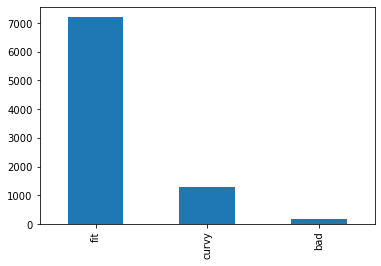

In [10]:
df.body_type.value_counts().plot.bar()

<AxesSubplot:>

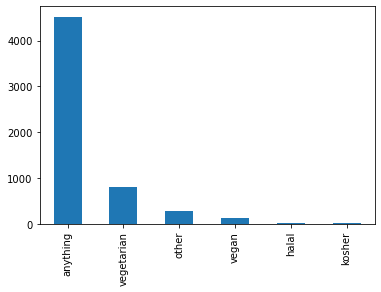

In [11]:
status={"mostly":"","strictly":""}
df["diet"].replace(status,regex=True,inplace=True)
df["diet"]=df["diet"].str.strip()
df["diet"].value_counts().plot.bar()

<AxesSubplot:>

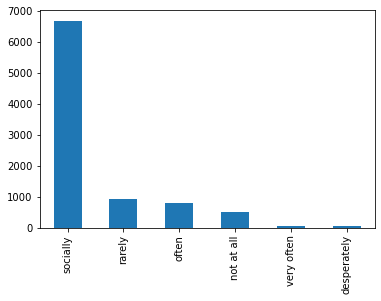

In [12]:
df.drinks.value_counts().plot.bar()

<AxesSubplot:>

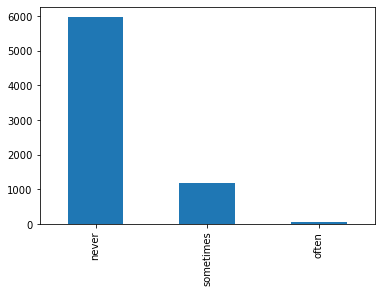

In [13]:
df.drugs.value_counts().plot.bar()

<AxesSubplot:>

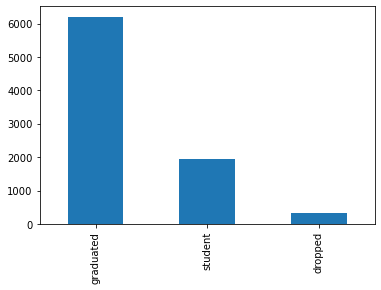

In [14]:
df["education"].replace({"working on":"student","graduated from":"graduated","dropped out":"dropped"},regex=True)
df["education"]=df["education"].str.split().str[0]
df["education"].replace({"college/university":"student","two-year":"student","masters":"student","working":"student","space":"student","ph.d":"graduated","law":"graduated","high":"graduated"},regex=True,inplace=True)
df["education"].value_counts().plot.bar()

In [15]:
df.drop(["ethnicity","job"],axis=1,inplace=True)

<AxesSubplot:xlabel='height'>

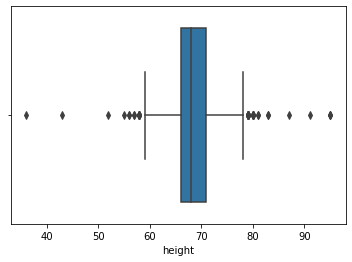

In [16]:
sns.boxplot("height",data=df)

<AxesSubplot:xlabel='income'>

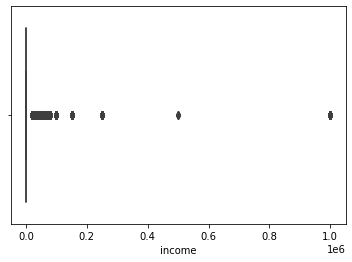

In [17]:
sns.boxplot("income",data=df)

<AxesSubplot:xlabel='last_online_year', ylabel='count'>

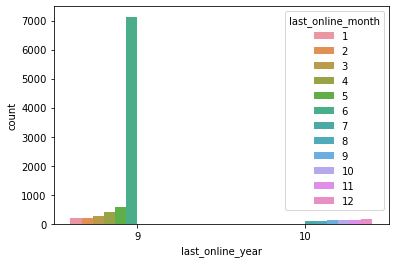

In [18]:
df["last_online_year"]=2021-(df['last_online'].str[:4]).astype(int)
df["last_online_month"]=(df['last_online'].str[5:7]).astype(int)
df.drop('last_online',axis=1)
sns.countplot("last_online_year",hue="last_online_month",data=df)

<AxesSubplot:>

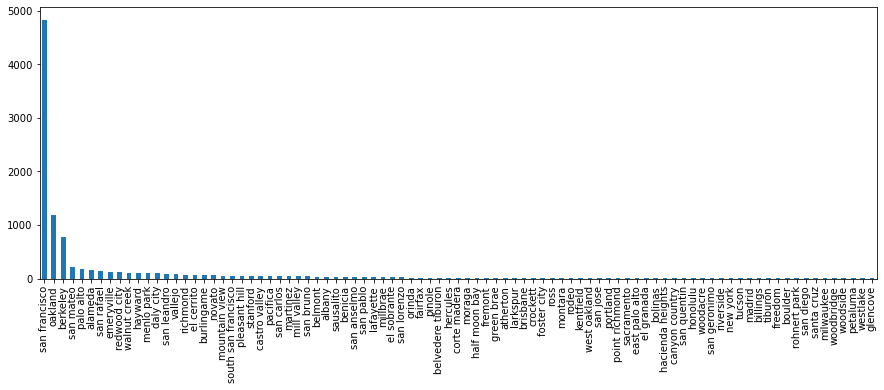

In [19]:
df.location=df.location.str.split(",").str[0]
plt.figure(figsize=(15,5))
df.location.value_counts().plot.bar()

<AxesSubplot:>

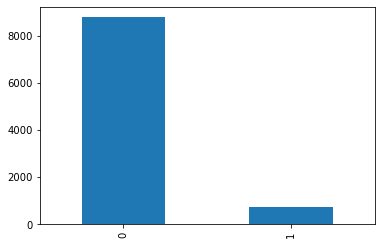

In [20]:
offsprings=[]
for i in df.offspring.fillna("bilinmiyor").str.replace("[^\w\s]",""):
    if "doesnrsquot" in i:
        offsprings.append("0")
    elif "bilinmiyor" in i:
        offsprings.append("0")
    else:
        offsprings.append("1")
        
df["offspring"]=offsprings
df["offspring"]=df["offspring"].astype(int)
df["offspring"].value_counts().plot.bar()

<AxesSubplot:>

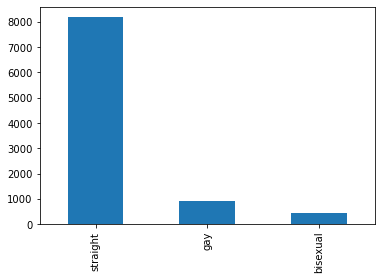

In [21]:
df.orientation.value_counts().plot.bar()

<AxesSubplot:>

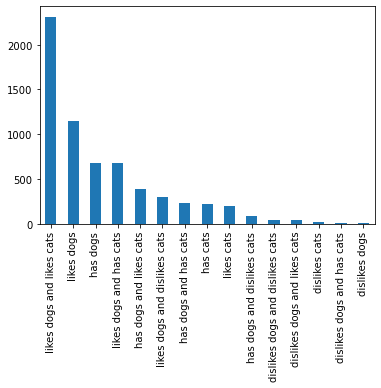

In [22]:
df.pets.value_counts().plot.bar()

<AxesSubplot:>

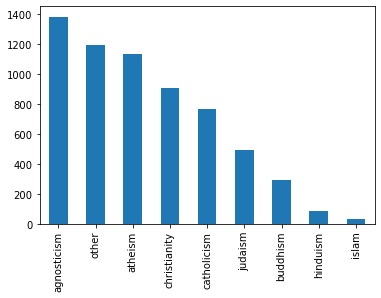

In [23]:
df["religion"]=df["religion"].str.split().str[0]
df["religion"].value_counts().plot.bar()

<AxesSubplot:>

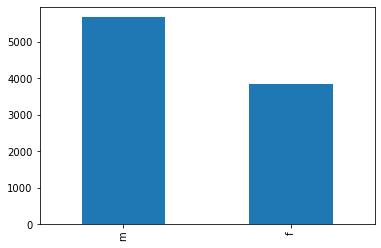

In [24]:
df.sex.value_counts().plot.bar()

<AxesSubplot:>

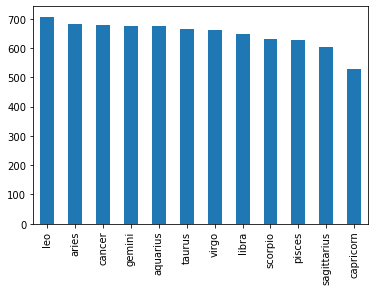

In [25]:
df["sign"]=df["sign"].str.split().str[0]
df["sign"].value_counts().plot.bar()

<AxesSubplot:>

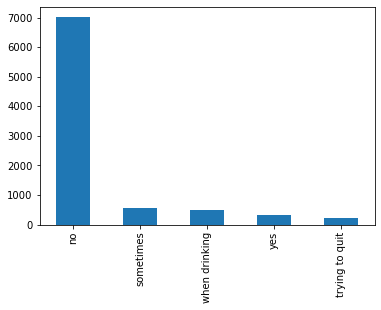

In [26]:
df.smokes.value_counts().plot.bar()

In [27]:
df["number_of_fluent_languages"]=df.speaks.str.count("fluently")
df["number_of_fluent_languages"].replace(0,1,regex=True,inplace=True)
df["number_of_poorly_languages"]=df.speaks.str.count("poorly")
df.drop("speaks",axis=1,inplace=True)

<AxesSubplot:xlabel='number_of_fluent_languages', ylabel='count'>

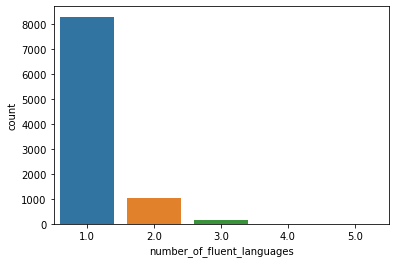

In [28]:
sns.countplot(df["number_of_fluent_languages"])

<AxesSubplot:xlabel='number_of_poorly_languages', ylabel='count'>

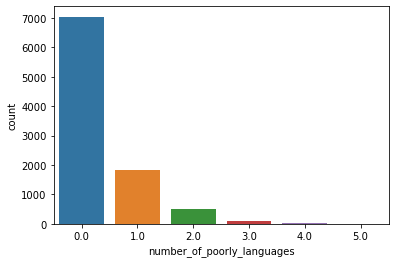

In [29]:
sns.countplot(df["number_of_poorly_languages"])

<AxesSubplot:>

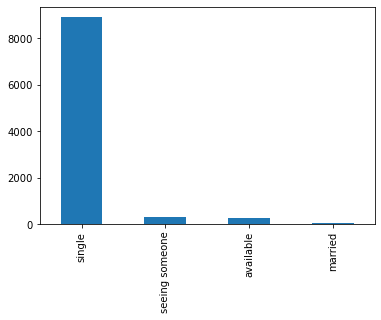

In [30]:
df.status.value_counts().plot.bar()

In [31]:
#Tüm number değerler ortalamalar ile dolduruldu
for column in df.select_dtypes(include=np.number):
    df[column].fillna(df[column].median(),inplace=True)

In [32]:
#Tüm object değerler en çok olan değer ile dolduruldu
for column in df.select_dtypes(include=np.object):
    df[column].fillna(df[column].mode()[0],inplace=True)

In [33]:
df.isnull().sum()

age                           0
body_type                     0
diet                          0
drinks                        0
drugs                         0
education                     0
height                        0
income                        0
last_online                   0
location                      0
offspring                     0
orientation                   0
pets                          0
religion                      0
sex                           0
sign                          0
smokes                        0
status                        0
last_online_year              0
last_online_month             0
number_of_fluent_languages    0
number_of_poorly_languages    0
dtype: int64

In [34]:
epoch=[]
for i in df["age"].values:
    if (i>=18) and (i<=32):
        epoch.append("Millennial")
    elif (i>=33) and (i<=47):
        epoch.append("Gen X-er")
    elif (48>=33) and (i<=70):
        epoch.append("Boomers")
    else:
        epoch.append("Unkown")

df["epoch"]=epoch

<AxesSubplot:>

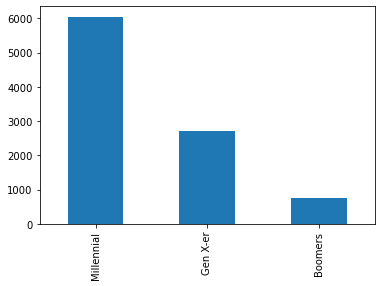

In [35]:
#1 tane 110 yaşında olanı da Boomers kuşağına aktardım
df["epoch"].replace("Unkown","Boomers",regex=True,inplace=True)
df["epoch"].value_counts().plot.bar()

In [36]:
#son durumda tablomuz:
df.sample(5)

,age,body_type,diet,drinks,drugs,education,height,income,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,status,last_online_year,last_online_month,number_of_fluent_languages,number_of_poorly_languages,epoch
6980,48.0,fit,anything,socially,never,graduated,69.0,-1.0,2012-06-18-14-14,oakland,1,gay,likes dogs and likes cats,other,m,sagittarius,no,single,9,6,1.0,0.0,Boomers
6792,48.0,fit,anything,socially,never,student,68.0,-1.0,2012-05-19-19-56,san francisco,0,gay,likes dogs and likes cats,agnosticism,m,aquarius,no,single,9,5,1.0,0.0,Boomers
6949,26.0,fit,anything,socially,never,student,70.0,-1.0,2012-06-29-14-04,san francisco,0,gay,likes dogs and likes cats,other,m,virgo,sometimes,single,9,6,1.0,0.0,Millennial
1889,36.0,fit,anything,socially,never,graduated,67.0,-1.0,2012-06-29-17-56,san mateo,0,straight,likes dogs,agnosticism,m,leo,sometimes,single,9,6,1.0,0.0,Gen X-er
8835,25.0,fit,anything,socially,never,graduated,68.0,-1.0,2012-06-29-22-33,berkeley,0,straight,has dogs,other,m,capricorn,no,single,9,6,3.0,0.0,Millennial


In [37]:
df.corr()

,age,height,income,offspring,last_online_year,last_online_month,number_of_fluent_languages,number_of_poorly_languages
age,1.000000,-0.022078,0.011424,0.341753,-0.015792,-0.003527,-0.024795,-0.001559
height,-0.022078,1.000000,0.073105,-0.033389,-0.016633,-0.010858,0.015458,0.036414
income,0.011424,0.073105,1.000000,0.015045,0.009376,0.002043,0.039186,0.028577
offspring,0.341753,-0.033389,0.015045,1.000000,0.029129,0.005697,0.000841,-0.012303
last_online_year,-0.015792,-0.016633,0.009376,0.029129,1.000000,0.685183,-0.003813,-0.034827
last_online_month,-0.003527,-0.010858,0.002043,0.005697,0.685183,1.000000,-0.006593,-0.006141
number_of_fluent_languages,-0.024795,0.015458,0.039186,0.000841,-0.003813,-0.006593,1.000000,0.067774
number_of_poorly_languages,-0.001559,0.036414,0.028577,-0.012303,-0.034827,-0.006141,0.067774,1.000000


In [38]:
df.describe()

,age,height,income,offspring,last_online_year,last_online_month,number_of_fluent_languages,number_of_poorly_languages
count,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000
mean,32.084192,68.337398,18887.145155,0.076624,9.077255,5.864936,1.146941,0.338974
std,9.445488,3.905229,91428.807808,0.266008,0.267009,1.627365,0.413248,0.645990
min,18.000000,36.000000,-1.000000,0.000000,9.000000,1.000000,1.000000,0.000000
25%,25.000000,66.000000,-1.000000,0.000000,9.000000,6.000000,1.000000,0.000000
50%,30.000000,68.000000,-1.000000,0.000000,9.000000,6.000000,1.000000,0.000000
75%,36.000000,71.000000,-1.000000,0.000000,9.000000,6.000000,1.000000,1.000000
max,110.000000,95.000000,1000000.000000,1.000000,10.000000,12.000000,5.000000,5.000000


<AxesSubplot:>

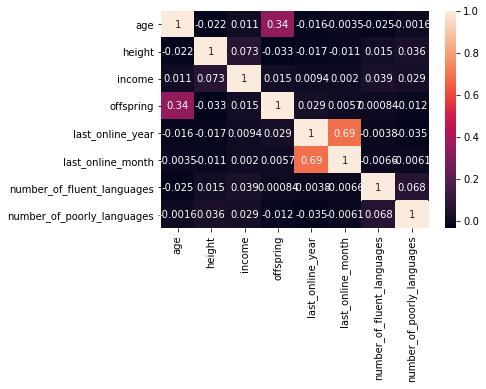

In [39]:
sns.heatmap(df.corr(),annot=True)

1 - Flört profiliniz yaşınızı tahmin edebilir mi? 

In [40]:
df_reg=pd.get_dummies(df,drop_first=True)

In [41]:
df_reg.shape

(9514, 6919)

In [42]:
x,y=df_reg.drop("age",axis=1),df[["age"]]

In [43]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [44]:
regression_funct(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.853268,3.651808,2.974204
Ridge,0.837541,3.842541,3.093045
LinearRegression,0.804106,4.219453,3.359626
ExtraTreeRegressor,0.728703,4.965567,3.856017
Lasso,0.572190,6.235505,4.213471
KNeighborsRegressor,0.432322,7.182853,4.793799
ElasticNet,0.308607,7.926994,5.422564


In [45]:
## Deep Learning Uygulanırsa?

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [47]:
x=scaler.fit_transform(x)

In [48]:
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,6868,6869,6870,6871,6872,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911,6912,6913,6914,6915,6916,6917
0,0.661017,0.000000,0.0,0.0,0.454545,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.576271,0.080001,0.0,0.0,0.454545,0.0,0.4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.542373,0.000000,0.0,0.0,0.454545,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.593220,0.020001,0.0,0.0,0.454545,0.0,0.2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.508475,0.000000,0.0,0.0,0.454545,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [49]:
x.shape,y.shape

((9514, 6918), (9514, 1))

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [51]:
model=Sequential()
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')#mse regression

In [52]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=100, verbose=1)

Epoch 1/100
60/60 [==============================] - 9s 108ms/step - loss: 359.3675 - val_loss: 36.3097
Epoch 2/100
60/60 [==============================] - 5s 76ms/step - loss: 19.7664 - val_loss: 21.5696
Epoch 3/100
60/60 [==============================] - 4s 72ms/step - loss: 7.2425 - val_loss: 26.8436
Epoch 4/100
60/60 [==============================] - 5s 78ms/step - loss: 4.4425 - val_loss: 20.4885
Epoch 5/100
60/60 [==============================] - 5s 79ms/step - loss: 2.9885 - val_loss: 19.8704
Epoch 6/100
60/60 [==============================] - 5s 79ms/step - loss: 2.1773 - val_loss: 18.8476
Epoch 7/100
60/60 [==============================] - 5s 77ms/step - loss: 1.7834 - val_loss: 19.6990
Epoch 8/100
60/60 [==============================] - 5s 78ms/step - loss: 1.9932 - val_loss: 20.0590
Epoch 9/100
60/60 [==============================] - 5s 82ms/step - loss: 1.6235 - val_loss: 19.2190
Epoch 10/100
60/60 [==============================] - 5s 78ms/step - loss: 1.4402 - val

60/60 [==============================] - 5s 80ms/step - loss: 0.4014 - val_loss: 17.9601
Epoch 82/100
60/60 [==============================] - 5s 83ms/step - loss: 0.2327 - val_loss: 17.4762
Epoch 83/100
60/60 [==============================] - 5s 81ms/step - loss: 0.2606 - val_loss: 17.2884
Epoch 84/100
60/60 [==============================] - 5s 78ms/step - loss: 0.1365 - val_loss: 17.8147
Epoch 85/100
60/60 [==============================] - 5s 84ms/step - loss: 0.1827 - val_loss: 17.2511
Epoch 86/100
60/60 [==============================] - 5s 82ms/step - loss: 0.2288 - val_loss: 17.2952
Epoch 87/100
60/60 [==============================] - 5s 81ms/step - loss: 0.2152 - val_loss: 17.5965
Epoch 88/100
60/60 [==============================] - 5s 79ms/step - loss: 0.1822 - val_loss: 17.1368
Epoch 89/100
60/60 [==============================] - 5s 84ms/step - loss: 0.2292 - val_loss: 17.5204
Epoch 90/100
60/60 [==============================] - 5s 80ms/step - loss: 0.2681 - val_loss: 1

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               5535200   
_________________________________________________________________
dense_1 (Dense)              (None, 800)               640800    
_________________________________________________________________
dense_2 (Dense)              (None, 800)               640800    
_________________________________________________________________
dense_3 (Dense)              (None, 800)               640800    
_________________________________________________________________
dense_4 (Dense)              (None, 800)               640800    
_________________________________________________________________
dense_5 (Dense)              (None, 800)               640800    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 8

In [54]:
pred=model.predict(x_test)

In [55]:
(mean_squared_error(y_test,pred))**.5

4.1085098167007885

In [56]:
r2_score(y_test,pred) 

0.8142723126867333

In [57]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
       
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]

    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
       
    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [58]:
y=df[["epoch"]]

In [59]:
df_class=df.drop("epoch",axis=1)
x=pd.get_dummies(df_class,drop_first=True)

In [60]:
classification_funct(x,y)

[03:01:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,accuracy_score
DecisionTreeClassifier,1.000000
XGBClassifier,1.000000
KNeighborsClassifier,0.987388
GaussianNB,0.963741
RandomForestClassifier,0.950604
LogisticRegression,0.865476
BernoulliNB,0.662112
SVC,0.647399


age alanı olduğu için %100 sonuç çıkmıştır. Age alanını kaldırıp tekrar deneyelim

In [66]:
df_class=df.drop(["epoch","age"],axis=1)
x=pd.get_dummies(df_class,drop_first=True)

In [67]:
classification_funct(x,y)

[03:16:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,accuracy_score
XGBClassifier,0.676301
RandomForestClassifier,0.671046
BernoulliNB,0.662112
SVC,0.647399
GaussianNB,0.642144
LogisticRegression,0.642144
DecisionTreeClassifier,0.621650
KNeighborsClassifier,0.615870
